In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
!kaggle datasets download -d sunilthite/cat-or-dog-image-classification

Dataset URL: https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification
License(s): other
cat-or-dog-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
from zipfile import ZipFile
dataset = "F:\Programing\Mastering Python\Pattern Project\cat-or-dog-image-classification.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\pc\AppData\Local\Temp\ipykernel_10652\1793886030.py:2: SyntaxWarning: invalid escape sequence '\P'
  dataset = "F:\Programing\Mastering Python\Pattern Project\cat-or-dog-image-classification.zip"


The dataset is extracted


In [31]:
# Import libraries 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [32]:
# Generator 
train_d = keras.utils.image_dataset_from_directory(
    directory = "F:\Programing\Mastering Python\Pattern Project\Train",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
test_d = keras.utils.image_dataset_from_directory(
    directory = "F:\Programing\Mastering Python\Pattern Project\Test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\pc\AppData\Local\Temp\ipykernel_10652\3902314296.py:3: SyntaxWarning: invalid escape sequence '\P'
  directory = "F:\Programing\Mastering Python\Pattern Project\Train",
C:\Users\pc\AppData\Local\Temp\ipykernel_10652\3902314296.py:10: SyntaxWarning: invalid escape sequence '\P'
  directory = "F:\Programing\Mastering Python\Pattern Project\Test",


Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [33]:
# Here all the img are sotre inform of numpy array which values from 0 to 255 there we normalize it
def normalize(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_d = train_d.map(normalize)
test_d = test_d.map(normalize)

In [34]:
#CNN Model

# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

# Fourth convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461,953 (13.21 MB)

 Trainable params: 3,461,249 (13.20 MB)

 Non-trainable params: 704 (2.75 KB)

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
history = model.fit(train_d, epochs=10, validation_data=test_d)

Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 704s 947ms/step - accuracy: 0.6423 - loss: 0.9458 - val_accuracy: 0.5980 - val_loss: 0.8459
Epoch 2/10
509/740 ━━━━━━━━━━━━━━━━━━━━ 3:39 948ms/step - accuracy: 0.7865 - loss: 0.4659

KeyboardInterrupt: 

In [37]:
loss,accuracy = model.evaluate(test_d)
print(f'Test Accuracy: {round(accuracy*100,2)} %')

121/121 ━━━━━━━━━━━━━━━━━━━━ 26s 214ms/step - accuracy: 0.4729 - loss: 0.6936
Test Accuracy: 46.98 %


In [38]:
model.save('cat_dog_classifier.keras')

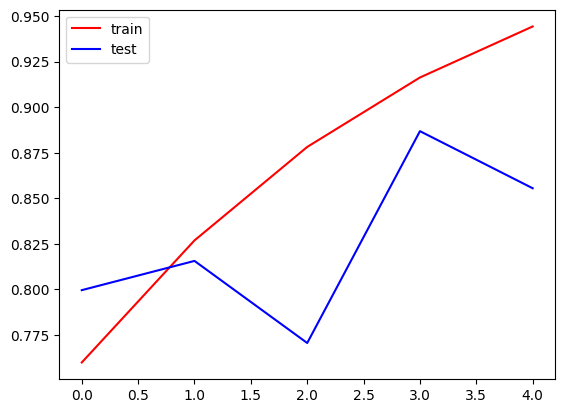

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\pc\AppData\Local\Temp\ipykernel_10652\4104143861.py:2: SyntaxWarning: invalid escape sequence '\P'
  test_img = cv.imread("F:\Programing\Mastering Python\Pattern Project\Cat.jpeg")


(1, 256, 256, 3)

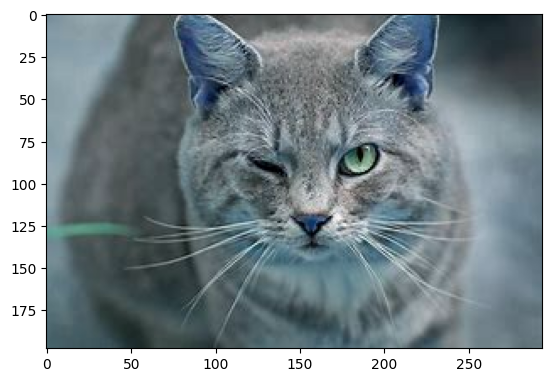

In [41]:
import cv2 as cv
test_img = cv.imread("F:\Programing\Mastering Python\Pattern Project\Cat.jpeg")
plt.imshow(test_img)
test_img = cv.resize(test_img,(256,256))
test_img = test_img.reshape(1,256,256,3)  # 1 image demension 256,256 and color 3 rgb
test_img.shape

In [95]:
prediction = model.predict(test_img)
print("Cat" if prediction[0] > 0.5 else "Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dog
